# PROJET 5 : Optimisez la gestion des données d'une boutique

In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# I) Création de la base de données regroupant ERP et CMS

## - Importation des tables erp, web et liaison

In [2]:
# Import fichier erp.xlsx
erp = pd.read_excel("erp.xlsx")

# import fichier web.xlsx
web = pd.read_excel("web.xlsx")

# Import fichier liaison.xlsx
liaison = pd.read_excel("liaison.xlsx")

C:\Users\open_\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\open_\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\open_\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


### - Informations de la table ERP

Il s'agit de l'export de l’ERP contenant les références produit, leur prix de vente et leur état de stock.

In [3]:
# Affichage et informations de la table erp
print("Table ERP :\n---------")
display(erp.head())
print("\nInfos de la table ERP :\n---------------------\n")
erp.info()
print("\n\nDescription de la table ERP :\n---------------------------")
display(erp.describe())

Table ERP :
---------


,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock



Infos de la table ERP :
---------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


Description de la table ERP :
---------------------------


,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.415636,26.496970
std,902.644635,0.337506,26.795849,45.892422
min,3847.000000,0.000000,5.200000,0.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


In [4]:
# Détection des valeurs nulles
display(erp.isnull().mean())

product_id        0.0
onsale_web        0.0
price             0.0
stock_quantity    0.0
stock_status      0.0
dtype: float64

La table ERP comporte 825 lignes et 5 colonnes.
Il n'y a aucune donnée manquante.
Chaque colonne possède le bon type.

***product_id*** est l'identifiant.

***onsale_web*** annonce si le produit est en vente sur le site internet, il s'agit d'une valeur booléenne 0 ou 1.

***price*** donne le prix du produit avec un minimum à 5.20 €, un maximum à 225 € et un prix moyen de 32.41 €.

***stock_quantity*** indique la valeur du stock.

***stock_status*** affiche le statut du stock, en stock ou non.

### - Création d'une fonction de vérification de la présence de doublons dans chaque colonne :

```
def testpk(df, colonnes):
    if df[colonnes].duplicated().unique().any() == False:
        print("La colonne", colonnes, "ne comporte pas de doublons")
        print("Elle peut être utilisée comme clé primaire")
    else:
        print("la colonne", colonnes, "comporte des doublons")
        print("Elle ne peut pas être utilisée comme clé primaire")
    print("Le DataFrame comporte", df.shape[0], "lignes et", df.shape[1], "colonnes")
```

In [5]:
# Fonction de test de la colonne pour détecter si la clé candidate ne comporte pas de doublons
def testpk(df, colonnes):
    if df[colonnes].duplicated().unique().any() == False:
        print("La colonne", colonnes, "ne comporte pas de doublons")
        print("Elle peut être utilisée comme clé primaire")
    else:
        print("la colonne", colonnes, "comporte des doublons")
        print("Elle ne peut pas être utilisée comme clé primaire")
    print("Le DataFrame comporte", df.shape[0], "lignes et", df.shape[1], "colonnes")

In [6]:
testpk(erp, ['product_id'])

La colonne ['product_id'] ne comporte pas de doublons
Elle peut être utilisée comme clé primaire
Le DataFrame comporte 825 lignes et 5 colonnes


Il n'y a aucune valeur nulle ni aucun doublon dans la colonne product_id qui nous servira de clé primaire.

### - Informations de la table web

Il s'agit de l'export d’une table de l’outil de CMS contenant les informations des produits commercialisés en ligne (nom, description, nombre de ventes...).

In [7]:
# Affichage et informations de la table web
print("Table WEB :\n---------")
display(web.head())
print("\nInfos de la table WEB:\n---------------------\n")
web.info()
print("\n\nDescription de la table WEB :\n---------------------------")
display(web.describe())

Table WEB :
---------


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0



Infos de la table WEB:
---------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title     

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,1513.0,1513.0,1513.0,1430.0,1430.000000,0.0,1430.000000,0.0,0.0,0.0,1430.0,1430.0,1430.0
mean,0.0,0.0,0.0,0.0,4.006993,NaN,1.998601,NaN,NaN,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,8.510559,NaN,0.037385,NaN,NaN,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0


La table web comporte 1513 lignes et 28 colonnes.
Les colonnes "virtual, downloadable, rating_count" sont complètes.
Les autres colonnes comportent des valeurs manquantes.

***sku*** est l'identifiant du produit. La colonne comporte 1428 valeurs sur 1513, ce qui fait 85 identifiants manquants.

***total_sales*** représente le nombre de ventes.

***post_date*** donne la date de mise en ligne du produit.

***post_modified*** indique la date de dernière modification.


In [8]:
# Détection du nombre de valeurs nulles par colonnes
display(web.isnull().sum())

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

In [9]:
# Affichage des valeurs nulles de la colonne SKU
web.loc[web["sku"].isnull(),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Vérification des doublons grâce à la fonction testpk
testpk(web, ["sku"])

la colonne ['sku'] comporte des doublons
Elle ne peut pas être utilisée comme clé primaire
Le DataFrame comporte 1513 lignes et 28 colonnes


In [11]:
# Doublons dans la colonne sku
print("\nLa colonne sku de la table WEB comporte", web["sku"].duplicated().sum(), "doublons.\n")
print("\nListe des index dont la ligne est un doublon :\n--------------------------------------------")
liste_doublons_web = web.index[(web["sku"].duplicated())]
display(liste_doublons_web)
print("\nEchantillon de la liste des doublons :\n------------------------------------")
web.loc[web["sku"].duplicated(keep=False),:].head()


La colonne sku de la table WEB comporte 798 doublons.


Liste des index dont la ligne est un doublon :
--------------------------------------------


Int64Index([ 179,  227,  230,  231,  233,  237,  283,  309,  310,  311,
            ...
            1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512],
           dtype='int64', length=798)


Echantillon de la liste des doublons :
------------------------------------


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


Tous les identifiants de la table web sont doublés, y compris les valeurs nulles.
L'identifiant sku comporte 85 valeurs nulles ainsi que 2 chaines de caractères.

On obtient (798*2) doublons - 85 valeurs nulles + 2 chaines de caractères = 1513 lignes


In [12]:
# Vérification d'éventuelles valeurs vides dans la colonne sku concernant des produits
web.loc[(web["sku"].isnull()) & (web["post_type"]=="product")]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


Il y a des valeurs vides dans les identifiants de 2 produits "pierre-jean-villa-cote-rotie-fongeant-2017" et "pierre-jean-villa-condrieu-suspendu-2018" dans la table web.

Cependant ils n'ont aucune correspondance avec la table ERP qui n'a pas de valeurs vides, ils seront donc supprimés.

### - Nettoyage des données de la table web

In [13]:
# Suppression des lignes dont l'identifiant est nul
mask = web.index[(web["sku"].isnull())].tolist()
web.drop(mask, axis=0, inplace=True)

In [14]:
# Affichage des lignes avec l'identifiant "bon cadeau"
web.loc[web["sku"] == "bon-cadeau-25-euros"]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1209,bon-cadeau-25-euros,0,0,0,0.0,10.0,NaN,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


La ligne **"bon-cadeau-25-euros"** est gardée car il y a eu 10 ventes de ce bon, il a donc un impact dans le chiffre d'affaire.

In [15]:
# Vérification des lignes dont l'identifiant n'est pas un entier
display(web.loc[web["sku"] == "13127-1"]) 

# Vérification des lignes dont l'identifiant est 131271
display(web.loc[web["sku"] == "131271"])

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count


In [16]:
# Remplacement de l'identifiant "13127-1" par "131271"
mask = web["sku"] == "13127-1"
web.loc[mask, "sku"] = "131271"

In [17]:
# Vérification des lignes dont l'identifiant n'est pas un entier
display(web.loc[web["sku"] == "13127-1"]) 

# Vérification des lignes dont l'identifiant est 131271
display(web.loc[web["sku"] == "131271"])

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
797,131271,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1511,131271,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [18]:
# Affichage des doublons dans la colonne sku et la colonne post_type dont la chaîne de caractères est "attachment"
web.sort_values(by=["sku", "post_type"], ascending=[True, False]).head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
339,38,0,0,0,0.0,38.0,taxable,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1123,38,0,0,0,0.0,38.0,NaN,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
269,41,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-14 12:01:43,...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1060,41,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-04-14 12:01:43,...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
70,304,0,0,0,0.0,40.0,taxable,NaN,2.0,2018-02-13 12:57:44,...,gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [19]:
# Nettoyage des doublons en supprimant la ligne qui comporte "attachment" dans la colonne post_type
mask = web[web["post_type"] == "attachment"].index
web_sku_unique = web.drop(mask)
web_sku_unique.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


La table web comporte 2 lignes pour le même produit. 
La 1ère est pour l'identification du produit et la 2ième est pour le contenu sur le site, comme la photo.
Il est inutile de garder la 2ième ligne.

Nous procédons donc à la suppression des doublons en ne gardant que la ligne produit.
**Le nouveau tableau comporte maintenant 714 références.**

In [20]:
print("\nDescription de la table WEB nettoyée :\n------------------------------------")
web_sku_unique.describe()


Description de la table WEB nettoyée :
------------------------------------


,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,714.0,714.0,714.0,714.0,714.000000,0.0,714.000000,0.0,0.0,0.0,714.0,714.0,714.0
mean,0.0,0.0,0.0,0.0,4.012605,NaN,1.998599,NaN,NaN,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,8.518183,NaN,0.037424,NaN,NaN,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0


### - Informations de la table liaison
Il s'agit de la table référençant les identifiants de la table ERP et leurs correspondances dans la table WEB.

In [21]:
# Affichage des informations de la table Liaison
print("Table Liaison :\n-------------")
display(liaison.head())
print("\nInformations de la table liaison :\n--------------------------------\n")
liaison.info()

Table Liaison :
-------------


,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815



Informations de la table liaison :
--------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


La table liaison comporte 825 lignes et 2 colonnes.

**product_id** est l'identifiant de la table erp

**id_web** est l'identifiant de la table web

In [22]:
# Vérification des doublons grâce à la fonction testpk
testpk(liaison, ["product_id"])
print("\n")
testpk(liaison, ["id_web"])

La colonne ['product_id'] ne comporte pas de doublons
Elle peut être utilisée comme clé primaire
Le DataFrame comporte 825 lignes et 2 colonnes


la colonne ['id_web'] comporte des doublons
Elle ne peut pas être utilisée comme clé primaire
Le DataFrame comporte 825 lignes et 2 colonnes


In [23]:
# Affichage des doublons dans la colonne id_web
liaison.loc[liaison["id_web"].duplicated()]

,product_id,id_web
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
151,4233,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


Les doublons dans la colonne id_web de la table liaison ne concernent que les valeurs nulles. Il n'y a pas de modification à opérer à ce niveau.

### - Nettoyage de la table liaison

In [24]:
# Affichage des index des valeurs nulles dans la colonne id_web
display(liaison.index[(liaison["id_web"].isnull())])
print("Il y a", liaison["id_web"].isnull().sum(), "valeurs nulles dans la colonne id_web.")

Int64Index([ 19,  49,  50, 119, 131, 151, 184, 185, 234, 238, 239, 242, 246,
            292, 318, 319, 320, 321, 322, 340, 352, 356, 384, 396, 416, 449,
            469, 472, 486, 487, 541, 547, 618, 621, 659, 696, 724, 726, 739,
            761, 762, 763, 764, 765, 766, 767, 768, 772, 773, 774, 775, 776,
            777, 778, 779, 780, 781, 782, 783, 788, 789, 790, 791, 794, 795,
            796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808,
            809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821],
           dtype='int64')

Il y a 91 valeurs nulles dans la colonne id_web.


Nous procédons au remplacement des 91 valeurs nulles par 0.

In [25]:
# Remplacement des NaN par 0
liaison["id_web"] = liaison["id_web"].fillna(0)

In [26]:
# Remplacement de l'identifiant "13127-1" par "131271"
mask = liaison["id_web"] == "13127-1"
liaison.loc[mask, "id_web"] = "131271"

In [27]:
# Vérification du nouvel identifiant
liaison.loc[liaison["id_web"] == "13127-1"]
liaison.loc[liaison["id_web"] == "131271"]

,product_id,id_web
822,7247,131271


In [28]:
# Détection d'une autre valeur avec un tiret
liaison["id_web"].unique()[-5:]

array([15891, 15887, '131271', '14680-1', 16230], dtype=object)

Présence d'une valeur avec un tiret à l'avant dernière position dans la colonne id_web.

In [29]:
# Remplacement de l'identifiant "14680-1" par "146801"
mask = liaison["id_web"] == "14680-1"
liaison.loc[mask, "id_web"] = "146801"

In [30]:
# Informations de la table Liaison
print("\nInformations de la table Liaison nettoyée :\n-----------------------------------------\n")
liaison.info()


Informations de la table Liaison nettoyée :
-----------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      825 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


Le nombre d'occurences de la table liaison n'a pas changé avec 825 lignes. Seules quelques valeurs ont été nettoyées.

## - Jointure des tables erp, web et liaison

Le résultat de la jointure donne la base de données regroupant les informations des produits hors ligne et ceux présents sur le site web.

Nous gardons uniquement les lignes des produits qui sont vendus et qui génèrent du chiffre d'affaires.

La Base de données comportera 714 entrées et 34 colonnes.

In [31]:
# Jointure de la table erp avec liaison (en outer)
erp_liaison = pd.merge(erp, liaison, on="product_id", how="outer")

# Affichage de la table erp_liaison
display(erp_liaison.head())

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815


In [32]:
# Vérification de l'unicité de la clé primaire product_id grâce à la fonction testpk
testpk(erp_liaison, ["product_id"])

La colonne ['product_id'] ne comporte pas de doublons
Elle peut être utilisée comme clé primaire
Le DataFrame comporte 825 lignes et 6 colonnes


In [33]:
# Vérification de l'unicité de la clé primaire id_web grâce à la fonction testpk
testpk(erp_liaison, ["id_web"])

la colonne ['id_web'] comporte des doublons
Elle ne peut pas être utilisée comme clé primaire
Le DataFrame comporte 825 lignes et 6 colonnes


In [34]:
# Jointure de la table erp_liaison avec web (en outer) et ajout de la colonne merge pour identifier le type de jointure
erp_liaison_web = pd.merge(erp_liaison, web_sku_unique, left_on="id_web", right_on="sku", how="outer", indicator=True)

# Affichage de la table erp_liaison_web
display(erp_liaison_web.head())

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,virtual,downloadable,rating_count,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,1,24.2,0,outofstock,15298,15298,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,1,34.3,0,outofstock,15296,15296,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,1,20.8,0,outofstock,15300,15300,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,1,14.1,0,outofstock,19814,19814,0.0,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,1,46.0,0,outofstock,19815,19815,0.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


In [35]:
# Vérification de l'unicité de la clé primaire product_id grâce à la fonction testpk
testpk(erp_liaison_web, ["product_id"])

La colonne ['product_id'] ne comporte pas de doublons
Elle peut être utilisée comme clé primaire
Le DataFrame comporte 825 lignes et 35 colonnes


In [36]:
# Vérification de l'unicité de la clé primaire id_web grâce à la fonction testpk
testpk(erp_liaison_web, ["id_web"])

la colonne ['id_web'] comporte des doublons
Elle ne peut pas être utilisée comme clé primaire
Le DataFrame comporte 825 lignes et 35 colonnes


In [37]:
# Vérification de l'unicité de la clé primaire sku grâce à la fonction testpk
testpk(erp_liaison_web, ["sku"])

la colonne ['sku'] comporte des doublons
Elle ne peut pas être utilisée comme clé primaire
Le DataFrame comporte 825 lignes et 35 colonnes


**Après vérification de l'unicité des clés candidates grâce à la fonction testpk, nous retenons la clé product_id comme clé primaire.**

Par la suite, pour calculer le chiffre d'affaires, nous retenons uniquement les lignes des produits vendus.

In [38]:
# On ne garde que les lignes des produits vendus sur le site en identifiant la jointure interne
erp_liaison_web = erp_liaison_web[erp_liaison_web["_merge"] == "both"]

# Résultat de la jointure des tables erp, web et liaison
print("\nOpération de jointure :\n---------------------")
display(erp_liaison_web.head())
print("\nInformations de la nouvelle table jointe :\n----------------------------------------\n")
erp_liaison_web.info()


Opération de jointure :
---------------------


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,virtual,downloadable,rating_count,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,1,24.2,0,outofstock,15298,15298,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,1,34.3,0,outofstock,15296,15296,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,1,20.8,0,outofstock,15300,15300,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,1,14.1,0,outofstock,19814,19814,0.0,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,1,46.0,0,outofstock,19815,19815,0.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both



Informations de la nouvelle table jointe :
----------------------------------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 824
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   product_id             714 non-null    int64         
 1   onsale_web             714 non-null    int64         
 2   price                  714 non-null    float64       
 3   stock_quantity         714 non-null    int64         
 4   stock_status           714 non-null    object        
 5   id_web                 714 non-null    object        
 6   sku                    714 non-null    object        
 7   virtual                714 non-null    float64       
 8   downloadable           714 non-null    float64       
 9   rating_count           714 non-null    float64       
 10  average_rating         714 non-null    float64       
 11  total_sales            714 non-null  

# II) Analyse
## A) Chiffre d'affaires par produit


Nous sélectionnons les colonnes utiles pour la base de données et nous créons une nouvelle colonne chiffre d'affaires par produits.

In [39]:
# Sélection des colonnes utiles pour notre BDD
data = erp_liaison_web[["product_id", "onsale_web", "price", "total_sales", "post_date", "post_modified", "post_title"]].copy()

# Création d'une colonne chiffre d'affaires par produits
data["chiffre d'affaires"] = data["total_sales"] * data["price"]
data.head()

,product_id,onsale_web,price,total_sales,post_date,post_modified,post_title,chiffre d'affaires
0,3847,1,24.2,6.0,2018-02-08 12:58:52,2019-12-30 09:30:29,Pierre Jean Villa Saint-Joseph Préface 2018,145.2
1,3849,1,34.3,0.0,2018-02-08 13:49:41,2019-12-21 09:00:17,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,0.0
2,3850,1,20.8,0.0,2018-02-08 14:08:36,2020-06-26 18:15:03,Pierre Jean Villa Crozes-Hermitage Accroche Co...,0.0
3,4032,1,14.1,3.0,2018-02-09 14:01:05,2020-01-04 16:36:01,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,42.3
4,4039,1,46.0,0.0,2018-02-12 09:04:37,2020-01-04 16:36:10,Pierre Jean Villa Côte Rôtie Carmina 2017,0.0


In [40]:
# Remplacement des NaN par 0 qui sont dûs à la création de la nouvelle colonne chiffre d'affaires
data[["total_sales", "chiffre d'affaires", "price"]] = data[["total_sales", "chiffre d'affaires", "price"]].fillna(0)
data.isna().mean()
# Conversion de la colonne total_sales en entier
data["total_sales"] = data["total_sales"].astype("int64")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 824
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   product_id          714 non-null    int64         
 1   onsale_web          714 non-null    int64         
 2   price               714 non-null    float64       
 3   total_sales         714 non-null    int64         
 4   post_date           714 non-null    datetime64[ns]
 5   post_modified       714 non-null    datetime64[ns]
 6   post_title          714 non-null    object        
 7   chiffre d'affaires  714 non-null    float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(1)
memory usage: 50.2+ KB


### - Filtrage des valeurs du chiffre d'affaires supérieures à 0.

In [41]:
data_vente = data.loc[data["chiffre d'affaires"] > 0,:].copy()
data_vente.describe()

,product_id,onsale_web,price,total_sales,chiffre d'affaires
count,385.000000,385.0,385.000000,385.000000,385.000000
mean,4882.867532,1.0,26.581429,7.441558,183.295065
std,737.259827,0.0,24.934530,10.447156,400.324073
min,3847.000000,1.0,5.700000,1.000000,6.500000
25%,4222.000000,1.0,12.500000,2.000000,38.600000
50%,4711.000000,1.0,19.000000,4.000000,81.600000
75%,5519.000000,1.0,31.700000,9.000000,164.400000
max,6930.000000,1.0,225.000000,96.000000,4704.000000


Dans cette nouvelle table, nous identifions uniquement les valeurs du chiffre d'affaires supérieures à 0.
Nous obtenons 385 occurences.

Le chiffre d'affaires minimum par produit est de 6,50 € pour un maxi à 4704 €.

La moyenne est d'environ 183 €.

La médiane qui sépare les valeurs en 2 est d'environ 81 €.

### - Chiffre d'affaires min et max par produits

In [42]:
# Valeurs minimum
ca_min = data_vente.sort_values(by="chiffre d'affaires").head()
print("\nProduits qui génèrent le moins de chiffre d'affaires :")
display(ca_min)
# Valeur max
ca_max = data_vente.sort_values(by="chiffre d'affaires", ascending=False).head()
print("\nProduits qui génèrent le plus de chiffre d'affaires :")
display(ca_max)


Produits qui génèrent le moins de chiffre d'affaires :


,product_id,onsale_web,price,total_sales,post_date,post_modified,post_title,chiffre d'affaires
454,4858,1,6.5,1,2018-05-03 11:37:55,2020-08-26 15:45:02,Château Turcaud Bordeaux Rosé 2019,6.5
542,5056,1,7.5,1,2018-07-27 10:21:50,2020-08-06 17:35:02,Domaine de Montgilet Anjou Rouge 2016,7.5
187,4171,1,7.8,1,2018-02-14 16:45:18,2020-08-27 16:05:02,Le Hameau Des Ollieux Monsieur Pinot 2017,7.8
240,4241,1,8.9,1,2018-02-20 10:07:09,2020-08-26 09:30:05,Parcé Frères IGP Côtes Catalanes Hommage à Fer...,8.9
243,4245,1,8.9,1,2018-02-20 10:32:11,2020-07-25 10:05:02,Parcé Frères IGP Pays d'Oc Zoé Viognier 2019,8.9



Produits qui génèrent le plus de chiffre d'affaires :


,product_id,onsale_web,price,total_sales,post_date,post_modified,post_title,chiffre d'affaires
286,4334,1,49.0,96,2018-03-01 14:02:44,2020-08-12 14:00:03,Champagne Gosset Grand Blanc de Blancs,4704.0
162,4144,1,49.0,87,2018-02-13 13:17:25,2020-08-14 16:45:03,Champagne Gosset Grand Rosé,4263.0
310,4402,1,176.0,13,2018-03-22 11:21:05,2020-08-22 11:35:03,Cognac Frapin VIP XO,2288.0
161,4142,1,53.0,30,2018-02-13 13:08:44,2020-08-20 09:30:03,Champagne Gosset Grand Millésime 2006,1590.0
160,4141,1,39.0,40,2018-02-13 12:57:44,2020-08-27 11:25:02,Champagne Gosset Grande Réserve,1560.0


### - Représentation graphique de la répartition du chiffre d'affaires par produits, supérieur à 0 €

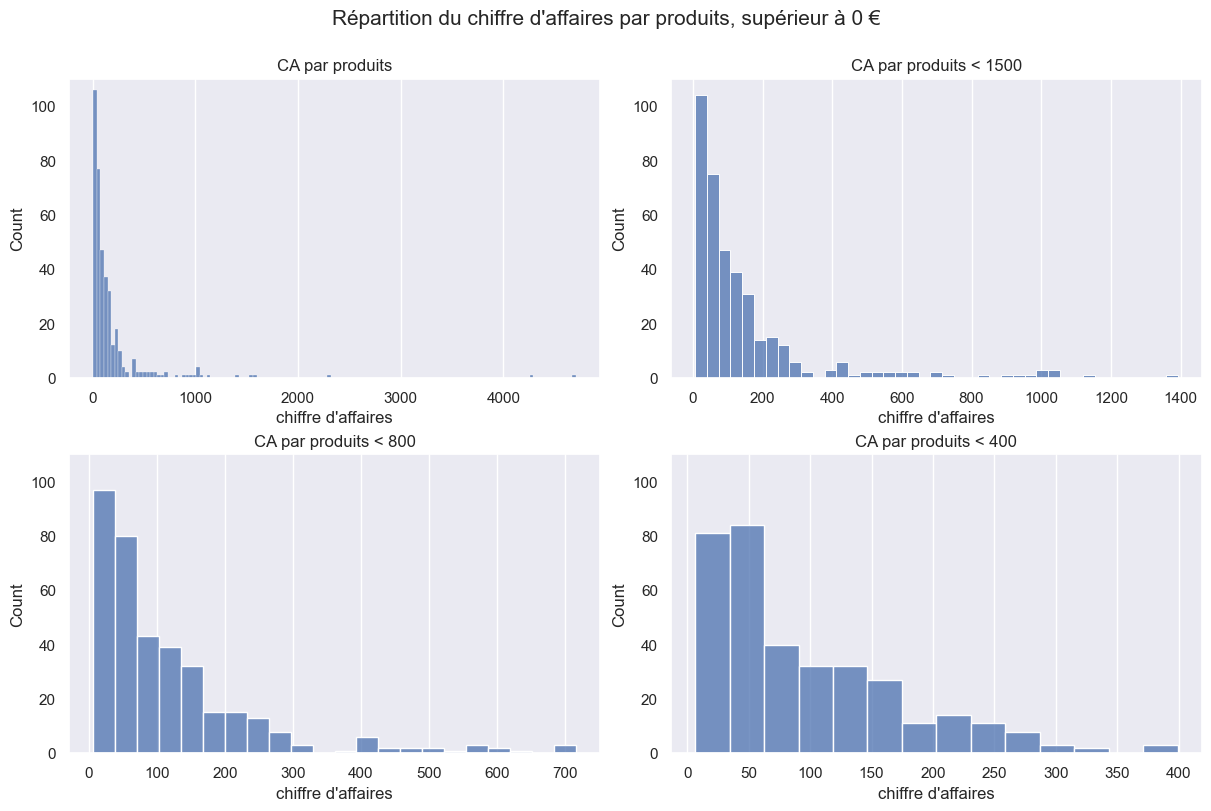

In [43]:
# Représentation graphique de la répartition du chiffre d'affaires par produits, supérieur à 0 €
sns.set_theme(style="darkgrid")

figure2 = plt.figure(layout="constrained", figsize=(12,8))
spec = figure2.add_gridspec(ncols=2, nrows=2)

ax0 = figure2.add_subplot(spec[0,0])
sns.histplot(data = data_vente, x="chiffre d'affaires")
plt.grid(axis="y")
plt.ylim(0,110)
plt.title("CA par produits")

ax1 = figure2.add_subplot(spec[0,1])
sns.histplot(data = data_vente[data_vente["chiffre d'affaires"] < 1_500], x="chiffre d'affaires")
plt.grid(axis="y")
plt.ylim(0,110)
plt.title("CA par produits < 1500")

ax2 = figure2.add_subplot(spec[1,0])
sns.histplot(data = data_vente[data_vente["chiffre d'affaires"] < 800], x="chiffre d'affaires")
plt.grid(axis="y")
plt.ylim(0,110)
plt.title("CA par produits < 800")

ax3 = figure2.add_subplot(spec[1,1])
sns.histplot(data = data_vente[data_vente["chiffre d'affaires"] < 400], x="chiffre d'affaires")
plt.grid(axis="y")
plt.ylim(0,110)
plt.title("CA par produits < 400")

figure2.suptitle("Répartition du chiffre d'affaires par produits, supérieur à 0 €\n", size=15)
plt.show()

Le chiffre d'affaires est majoritairement réparti autour des plus petites valeurs jusqu'à 200 €. cela signifie que la plus grande partie des ventes représente un petit montant et que le cumul du chiffre d'affaires se situe dans cette fourchette.

En revanche, les grands montants représentent une quantité de vente plus faible.

### - Graphique de corrélation entre chiffre d'affaires et prix des produits

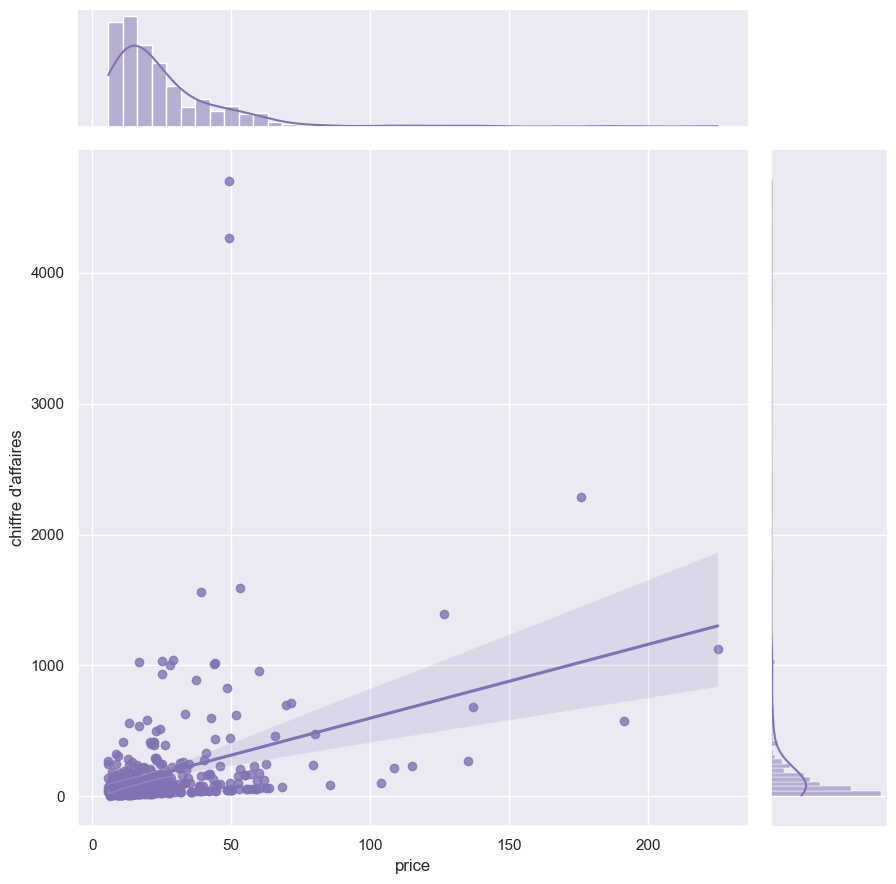

In [44]:
sns.set_theme(style="darkgrid")
sns.jointplot(x="price", y="chiffre d'affaires", data=data_vente, kind='reg', color="m", height=9)
plt.show()

### - Coefficient de corrélation

In [45]:
# Coefficient de Pearson
st.pearsonr(data_vente["price"],data_vente["chiffre d'affaires"])[0]

0.3513211525839528

D'après le graphique de corrélation entre les prix des produits et le chiffre d'affaires, nous constatons une concentration des valeurs. 

Le chiffre d'affaire est principalement réalisé avec la vente de produits dont le prix est compris entre 0 et 100 €.

Le coefficient de Pearson est de 0.35, plus proche de 0 que de 1, ce qui nous indique qu'il n'y a pas de véritable corrélation entre le prix et le chiffre d'affaires.

### - Représentation en boîtes à moustaches

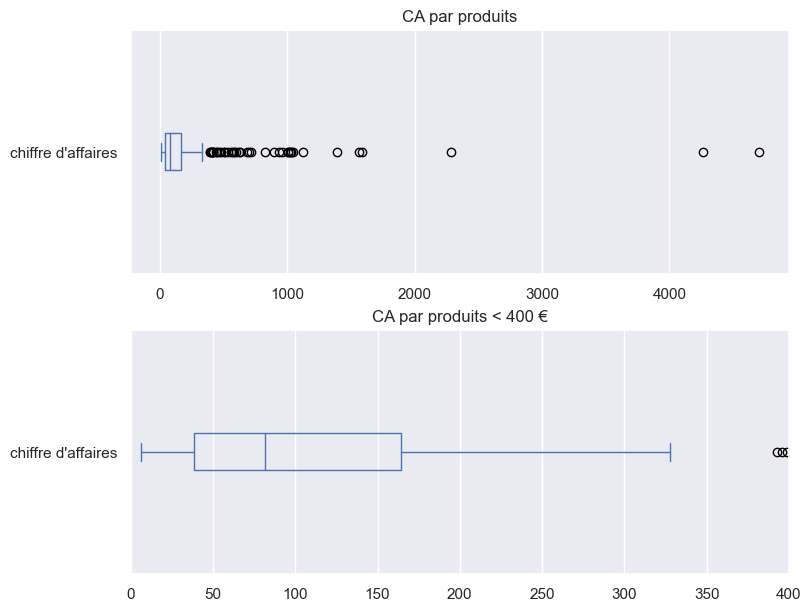

In [46]:
sns.set_theme(style="darkgrid")

figure3 = plt.figure(layout="constrained", figsize=(8,6))
spec = figure3.add_gridspec(ncols=1, nrows=2)

ax0 = figure3.add_subplot(spec[0,0])
data_vente.boxplot(column = "chiffre d'affaires", vert = False, color="b")
plt.grid(axis="y")
plt.title("CA par produits")

ax1 = figure3.add_subplot(spec[1,0])
data_vente.boxplot(column = "chiffre d'affaires", vert = False, color="b")
plt.grid(axis="y")
plt.xlim(0,400)
plt.title("CA par produits < 400 €")

plt.show()

Sur ces graphiques nous retrouvons la valeur minimum du chiffre d'affaires à 6,50 € et le maxi à 4704 €.

Le premier quartile est à 38 €, il représente le chiffre d'affaires de 25% des produits vendus.

La médiane est de 81 €, elle est la valeur qui sépare le chiffre d'affaire de manière égale en nombre de produits vendus. 

Le troisième quartile est de 164 € et représente 75% des produits vendus.

### - Calcul de l'écart type et du coefficient de variation

La **variance** est une mesure de dispersion des valeurs de l'échantillon de données.
Elle nous permet de calculer **l'écart type** qui représente l'écart avec la moyenne.
Ensuite le **coefficient de variation** nous indique l'écart en pourcentage avec la moyenne.

In [47]:
# Calcul de la variance (empirique corrigée)
variance = data_vente["chiffre d'affaires"].var(ddof=0)
print("La variance est de", round(variance,2))

# Calcul de l'écart type
ecart_type = data_vente["chiffre d'affaires"].std()
print("L'écart type représente", round(ecart_type,2), "€ avec la moyenne.")

# Coefficient de variation
coeff_variation = (data_vente["chiffre d'affaires"].std()) / (data_vente["chiffre d'affaires"].mean())
print("Le coefficient de variation représente", round(coeff_variation,2), "% d'écart avec la moyenne.")

La variance est de 159843.11
L'écart type représente 400.32 € avec la moyenne.
Le coefficient de variation représente 2.18 % d'écart avec la moyenne.


### - Calcul du skewness empirique

Le skewness (γ ou gamma) est une mesure d'asymétrie de la distribution du chiffre d'affaires. Cela détermine vers quelle valeur tend l'histogramme.

Si γ = 0 alors la distribution est symétrique,

Si γ > 0 alors la distribution est étalée à droite.

Si γ < 0 alors la distribution est étalée à gauche.

In [48]:
# Calcul du skewness
skewness = data_vente["chiffre d'affaires"].skew()
print("Le skewness est de", round(skewness,2), ", ce qui veut dire que la courbe est étalée à droite" )

Le skewness est de 7.47 , ce qui veut dire que la courbe est étalée à droite


### - La courbe de Lorenz

La courbe de Lorenz est une représentation graphique permettant de visualiser la distribution d'une variable au sein de de la population totale.

Dans notre situation il s'agit de représenter la part de chiffre d'affaires générée par chaque produit sur la totalité du chiffre d'affaire des produits.

**La médiale** est le point de croisement de la moitié de la valeur du chiffre d'affaire total avec la courbe de Lorenz. 
Elle identifie le partage de la moitié du chiffre d'affaire répartie par les produits. 

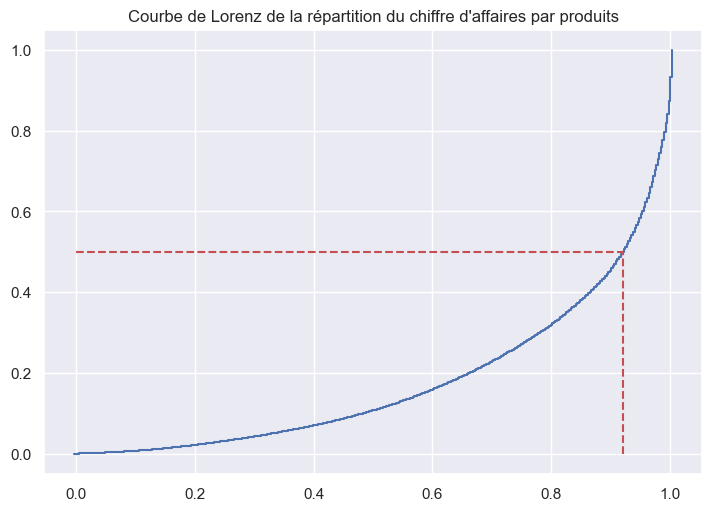

In [49]:
# Courbe de Lorenz
sns.set_theme(style="darkgrid")

figure4 = plt.figure(layout="constrained", figsize=(7,5))
ca = data_vente["chiffre d'affaires"].values
n = len(ca)
lorenz = np.cumsum(np.sort(ca)) / ca.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.title("Courbe de Lorenz de la répartition du chiffre d'affaires par produits")

# Représentation de la médiale
plt.plot([0,0.92], [0.5,0.5], "r--")
plt.plot([0.92,0.92], [0,0.5], "r--")

plt.show()

Nous constatons qu'environ 92 % des produits vendus représentent la moitié du chiffre d'affaires.

Les 8 % restants sont les produits plus chers et représentent la seconde moitié du chiffre d'affaires.

### - Calcul de l'indice de Gini

**L'indice de Gini** est un indicateur synthétique permettant de rendre compte du niveau d'inégalité pour une variable et sur une population donnée. Il varie entre 0 (égalité parfaite) et 1 (inégalité extrême).

Cet indice nous permet de savoir si le chiffre d'affaires est réparti de manière égalitaire ou non par produits vendus.

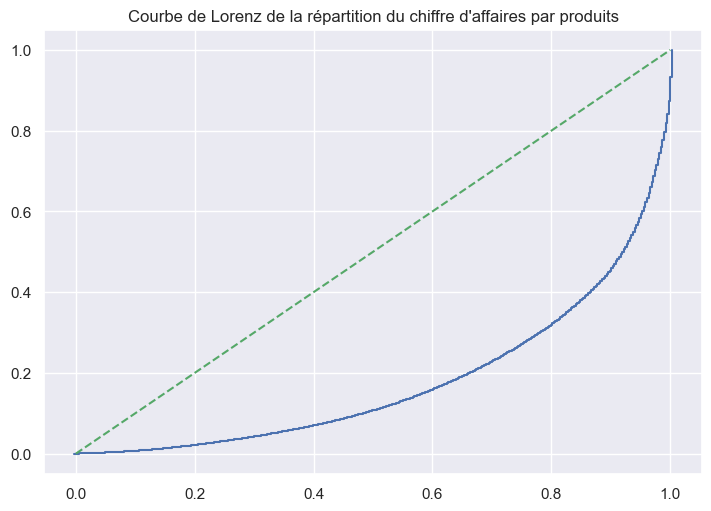

L'indice de Gini représente 0.64


In [50]:
sns.set_theme(style="darkgrid")

figure4 = plt.figure(layout="constrained", figsize=(7,5))
ca = data_vente["chiffre d'affaires"].values
n = len(ca)
lorenz = np.cumsum(np.sort(ca)) / ca.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.title("Courbe de Lorenz de la répartition du chiffre d'affaires par produits")

# Représentation de la première bissectrice
plt.plot([0,1], [0,1], "g--")

plt.show()

# Indice de Gini
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print("L'indice de Gini représente", round(gini, 2))

Avec une valeur de 0.64, l'indice de Gini est plutôt éloigné de 0, voire plus proche de 1.

Cela exprime une certaine inégalité dans la répartition du chiffre d'affaires par produits.

## B) Chiffre d'affaires total en ligne

In [51]:
# Groupement des produits par vente en ligne
data.groupby("onsale_web")["chiffre d'affaires"].sum()

onsale_web
1    70568.6
Name: chiffre d'affaires, dtype: float64

Nous constatons que toutes les ventes se font exclusivement en ligne, car les produits qui ne sont pas en vente sur le site ne dégagent pas de chiffre d'affaires.

**Le chiffre d'affaires total en ligne représente 70568.60 €.**

In [52]:
# Analyse de la période
display(data_vente["post_date"].sort_values().head(1))
display(data_vente["post_modified"].sort_values().tail(1))

0   2018-02-08 12:58:52
Name: post_date, dtype: datetime64[ns]

210   2020-08-27 18:55:03
Name: post_modified, dtype: datetime64[ns]

L'analyse des dates de publication des produits nous indique que le chiffre d'affaires réalisé débute au moins à partir de la 1ère publication, c'est à dire le 08/02/2018.

Il se termine au plus tard à la dernière date de modification de la publication le 27/08/2020.

La période étudiée s'étend sur 31 mois.

# III) Analyse des prix des produits pour détecter les anomalies

Nous travaillons ici sur les prix des produits en excluant les valeurs égales à 0.

In [53]:
# Conversion de la colonne prix en valeurs décimales pour uniformiser la série
data["price"] = data["price"].astype("float64")

In [54]:
# Exclusion des valeurs égales à 0
data_prod = data.loc[data["price"] >= 0, :]

In [55]:
# Affichage des informations sur les prix des produits
print("colonne prix et type de la table data :\n---------------------------------------\n")
display(data_prod["price"].info())
print("\ninformations de la colonne prix :\n---------------------------------")
display(data_prod["price"].describe())

colonne prix et type de la table data :
---------------------------------------

<class 'pandas.core.series.Series'>
Int64Index: 714 entries, 0 to 824
Series name: price
Non-Null Count  Dtype  
--------------  -----  
714 non-null    float64
dtypes: float64(1)
memory usage: 11.2 KB


None


informations de la colonne prix :
---------------------------------


count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

Les prix sont au format décimal. La plus petite valeur est de 5,20 € et la plus grande valeur est de 225 €.

La moyenne des prix est égale à environ 32 € et le prix médian représente environ 24 €.

In [56]:
# Vérification des valeurs manquantes
data_prod["price"].isnull().unique()

array([False])

Il n'y a aucune valeur manquante ou nulle.

### - Graphique en nuage de points

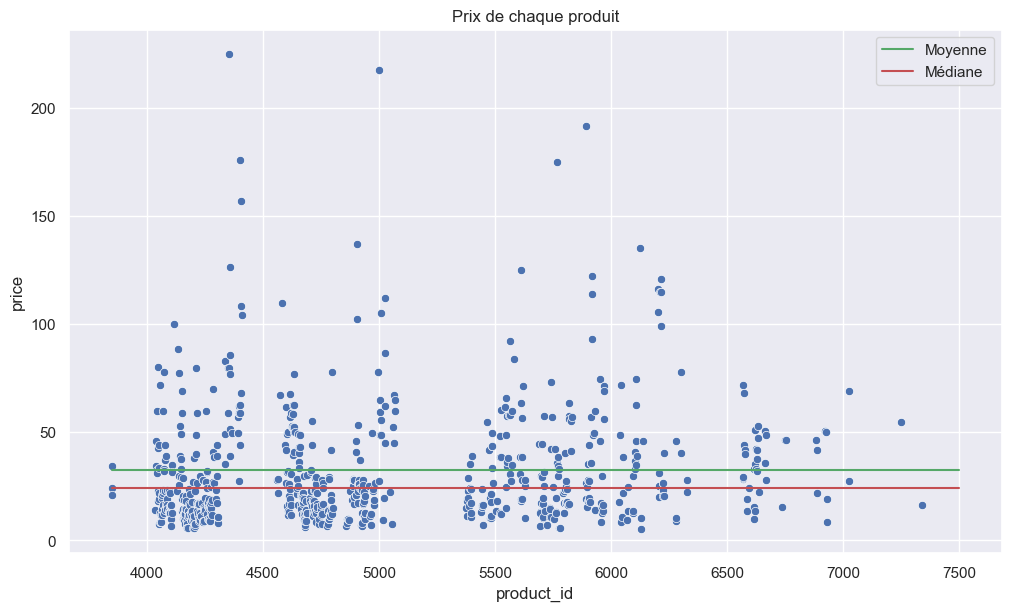

In [57]:
plt.figure(layout="constrained", figsize=(10,6))
sns.scatterplot(data=data_prod, x="product_id", y="price")
plt.plot([3847,7500],[32.40,32.40], "g", label="Moyenne")
plt.plot([3847,7500],[24.40,24.40], "r", label="Médiane")
plt.legend()
plt.title("Prix de chaque produit")

plt.show()

Sur ce graphique la concentration des prix se situe entre 5,20 € et environ 100 €.

Toutes les valeurs situées au dessus de 100 € ne représentent pas le plus grand nombre de produits et leur prix s'étend fortement.

### - Graphique de distribution du prix des produits

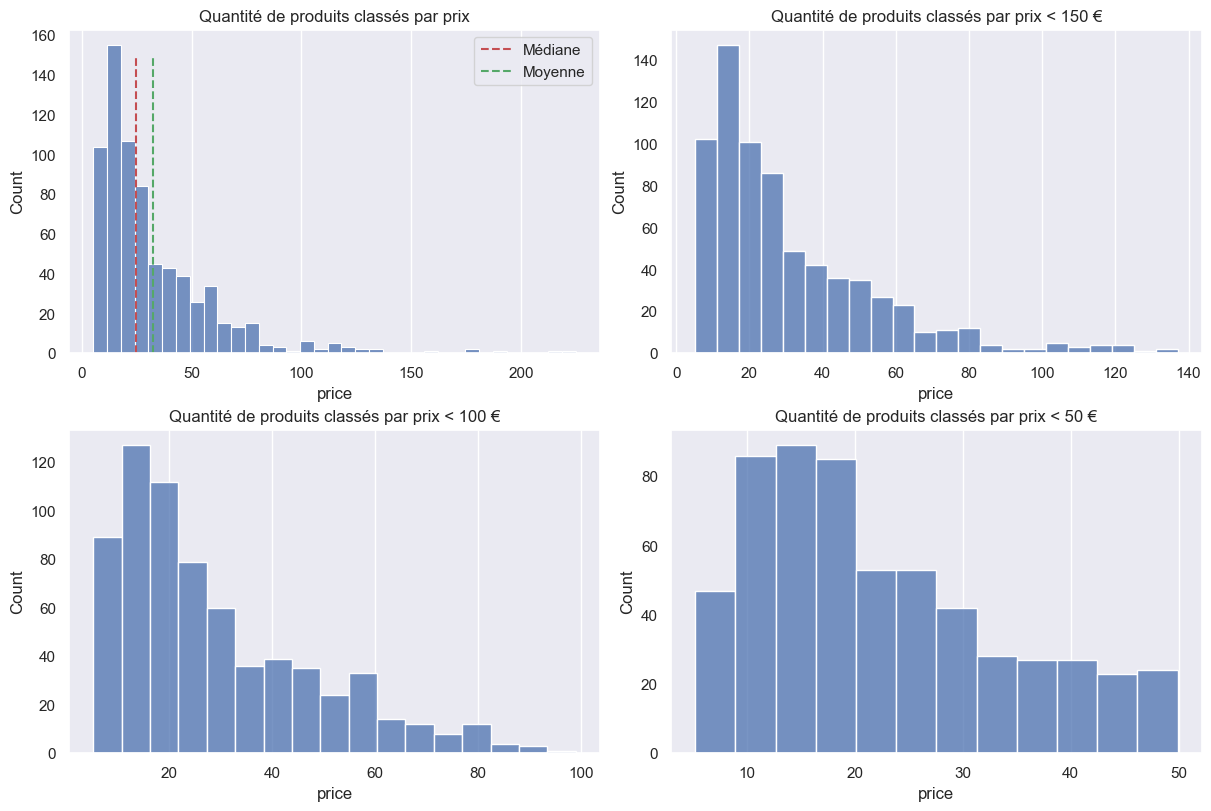

In [58]:
figure5 = plt.figure(layout="constrained", figsize=(12,8))
spec = figure5.add_gridspec(ncols=2, nrows=2)

ax0 = figure5.add_subplot(spec[0,0])
sns.histplot(data = data_prod, x="price")
plt.plot([24.40,24.40],[0,150], "r--", label="Médiane")
plt.plot([32.41,32.41],[0,150], "g--", label="Moyenne")
plt.legend()
plt.grid(axis="y")
plt.title("Quantité de produits classés par prix")

ax1 = figure5.add_subplot(spec[0,1])
sns.histplot(data = data_prod[data_prod["price"] < 150], x="price")
plt.grid(axis="y")
plt.title("Quantité de produits classés par prix < 150 €")

ax2 = figure5.add_subplot(spec[1,0])
sns.histplot(data = data_prod[data_prod["price"] < 100], x="price")
plt.grid(axis="y")
plt.title("Quantité de produits classés par prix < 100 €")

ax3 = figure5.add_subplot(spec[1,1])
sns.histplot(data = data_prod[data_prod["price"] < 50], x="price")
plt.grid(axis="y")
plt.title("Quantité de produits classés par prix < 50 €")


plt.show()

La majorité des prix des produits sont situés entre 5,20 € et 50 € avec des quantités supérieures à 40.

En ne sélectionnant que les produits sur la tranche de prix allant jusqu'à 50 €, nous voyons avec plus de précision la plus forte quantité de produits qui se situe entre un peu moins de 10 € et 20 €.

### - Mesure de tendance centrale

Pour la variable de prix c'est la valeur la plus fréquente, c'est à dire la plus forte quantité de produits qui ont le même prix.

In [59]:
# Calcul de la tendance centrale
data_prod["price"].mode()

0    19.0
Name: price, dtype: float64

Le plus grand regroupement de produits qui ont le même prix est de 45 occurences, dans la tranche de prix entre 10 et 20 €.

Il est à noter que pour un souci de visualisation, les références produits sont regroupées par segment et additionnent plusieurs références. Ce qui fait que sur le graphique les barres dépassent la mesure de tendance centrale.

Le mode ne concerne qu'une seule référence produit.

### - Calcul de l'écart type et du coefficient de variation

La **variance** est une mesure de dispersion des valeurs de l'échantillon de données.
Elle nous permet de calculer **l'écart type** qui représente l'écart avec la moyenne.
Ensuite le **coefficient de variation** nous indique l'écart en pourcentage avec la moyenne.

In [60]:
# Calcul de la variance (empirique corrigée)
variance = data_prod["price"].var(ddof=0)
print("La variance est de", round(variance,2))

# Calcul de l'écart type
ecart_type = data_prod["price"].std()
print("L'écart type représente", round(ecart_type,2), "€ avec la moyenne.")

# Coefficient de variation
coeff_variation = data_prod["price"].std() / data_prod["price"].mean()
print("Le coefficient de variation représente", round(coeff_variation,2), "% d'écart avec la moyenne.")

La variance est de 772.34
L'écart type représente 27.81 € avec la moyenne.
Le coefficient de variation représente 0.86 % d'écart avec la moyenne.


### - Skewness ou mesure d'asymétrie

Le skewness (γ ou gamma) est une mesure d'asymétrie de la distribution du chiffre d'affaires. Cela détermine vers quelle valeur tend l'histogramme.

Si γ = 0 alors la distribution est symétrique,

Si γ > 0 alors la distribution est étalée à droite.

Si γ < 0 alors la distribution est étalée à gauche.

In [61]:
# Calcul du skewness
data_prod["price"].skew()

2.58090126300337

Le skewness empirique est supérieur à 0, cela veut dire que la distribution est étalée à droite.

### - Représentation en boîtes à moustaches

Pour détecter les valeurs outliers.

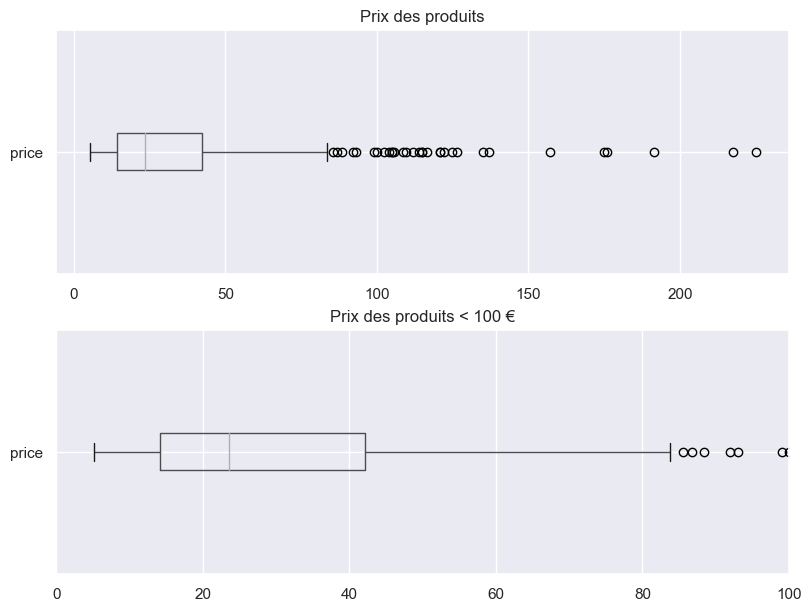

In [62]:
figure6 = plt.figure(layout="constrained", figsize=(8,6))
spec = figure6.add_gridspec(ncols=1, nrows=2)

ax0 = figure6.add_subplot(spec[0,0])
data_prod.boxplot(column = "price", vert = False)
plt.title("Prix des produits")

ax1 = figure6.add_subplot(spec[1,0])
data_prod.boxplot(column = "price", vert = False)
plt.xlim(0,100)
plt.title("Prix des produits < 100 €")

plt.show()

Sur ces graphiques nous retrouvons la valeur minimum du prix des produits à 5,20 € et le maxi à 225 €.

Le premier quartile est à 14.60 €, il représente le premier quart du prix des produits.

La médiane est de 24,40 €, elle est la valeur qui sépare le prix de manière égale en nombre de produits. 

Le troisième quartile est de 42 € et représente le troisième quart du prix des produits.

**Les valeurs outliers sont représentées sous forme de points. Elles sont caractérisées de la sorte lorsqu'elles sont supérieures à la valeur du 3ième quartile plus 1,5 fois l'intervalle inter-quartile.**

# - Listing des valeurs outliers des prix

### - Calcul du Z score pour la détection d'outliers

Le Z score est un indice statistique permettant de savoir si la valeur est plus grande ou plus petite que la moyenne et à quel distance elle se trouve de celle-ci.

Z score = (X - moyenne) / écart type

J'ai choisi comme seuil : 2

Si le Z score d'une valeur est supérieur à 2, elle est considérée comme éloigné de la moyenne et elle est définie comme outlier.

In [63]:
# Détection des valeurs ayant un Z score > 2

moyenne = data_prod["price"].mean()
ecart_type = data_prod["price"].std()

threshold = 2
outlier = []
for i in data_prod["price"]:
    z = (i-moyenne)/ecart_type
    if z > threshold:
        outlier.append(i)
print('Les outliers dans les prix sont :', outlier)

Les outliers dans les prix sont : [100.0, 88.4, 225.0, 126.5, 176.0, 108.5, 157.0, 104.0, 109.6, 102.3, 137.0, 217.5, 105.0, 105.0, 112.0, 92.0, 124.8, 175.0, 191.3, 93.0, 122.0, 114.0, 135.0, 105.6, 116.4, 115.0, 121.0, 99.0, 115.0, 121.0]


In [64]:
# Liste des produits dont le prix est un outlier
liste_outlier = data_prod.loc[data_prod["price"].isin(outlier),:]
print("Liste des outliers dans les prix :\n--------------------------------")
display(liste_outlier.head())
print("\nDescription de la liste :\n-----------------------")
liste_outlier.describe()

Liste des outliers dans les prix :
--------------------------------


,product_id,onsale_web,price,total_sales,post_date,post_modified,post_title,chiffre d'affaires
154,4115,1,100.0,0,2018-02-13 11:08:45,2020-02-08 11:45:02,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,0.0
156,4132,1,88.4,0,2018-02-13 11:43:55,2020-02-20 09:55:02,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,0.0
291,4352,1,225.0,5,2018-03-02 10:30:04,2020-03-07 11:18:45,Champagne Egly-Ouriet Grand Cru Millésimé 2008,1125.0
293,4355,1,126.5,11,2018-03-02 10:46:10,2020-08-13 10:15:02,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,1391.5
310,4402,1,176.0,13,2018-03-22 11:21:05,2020-08-22 11:35:03,Cognac Frapin VIP XO,2288.0



Description de la liste :
-----------------------


,product_id,onsale_web,price,total_sales,chiffre d'affaires
count,30.00000,30.0,30.0000,30.000000,30.000000
mean,5306.30000,1.0,127.1300,1.466667,229.480000
std,772.23014,0.0,35.8097,3.202729,519.923746
min,4115.00000,1.0,88.4000,0.000000,0.000000
25%,4450.75000,1.0,105.0000,0.000000,0.000000
50%,5295.00000,1.0,115.0000,0.000000,0.000000
75%,6074.00000,1.0,132.8750,1.750000,188.750000
max,6216.00000,1.0,225.0000,13.000000,2288.000000


**Nous retrouvons 30 valeurs outliers au total.**

### - Graphique en barre des produits outliers

<Figure size 800x600 with 0 Axes>

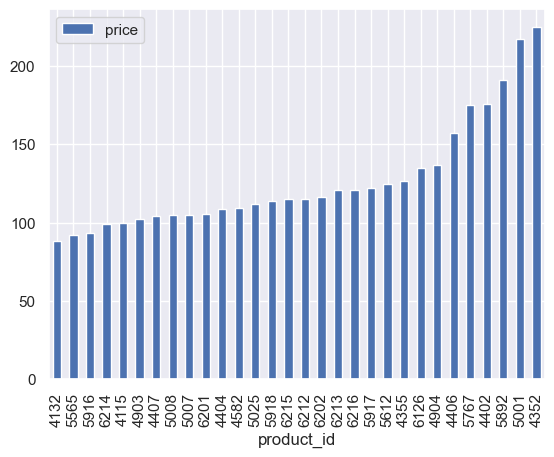

In [65]:
plt.figure(layout="constrained", figsize=(8,6))
liste_outlier = liste_outlier.sort_values(by="price")
liste_outlier.plot(x="product_id", y="price", kind="bar", label="price")
plt.legend()
plt.show()

### - La courbe de Lorenz

La courbe de Lorenz est une représentation graphique permettant de visualiser la distribution d'une variable au sein de de la population totale.

Dans notre situation il s'agit de représenter le prix de chaque produit sur la totalité des produits.

**La médiale** est le point de croisement de la moitié des produits avec la courbe de Lorenz. 
Elle identifie le partage de la moitié des produits en fonction de leur prix. 

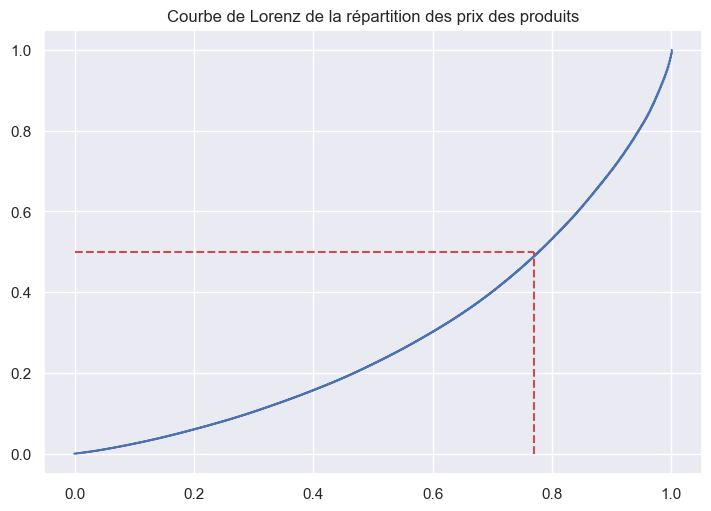

In [66]:
# Courbe de Lorenz
figure7 = plt.figure(layout="constrained", figsize=(7,5))
prix = data_prod["price"].values
n = len(prix)
lorenz = np.cumsum(np.sort(prix)) / prix.sum()
lorenz = np.append([0],lorenz)
xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.title("Courbe de Lorenz de la répartition des prix des produits")

# Représentation de la médiale
plt.plot([0,0.77], [0.5,0.5], "r--")
plt.plot([0.77,0.77], [0,0.5], "r--")

plt.show()

Grâce à la courbe de Lorenz et au tracé de la médiale, nous constatons que 77 % des produits représentent la moitié de la fourchette des prix.

### - L'indice de Gini

**L'indice de Gini** est un indicateur synthétique permettant de rendre compte du niveau d'inégalité pour une variable et sur une population donnée. Il varie entre 0 (égalité parfaite) et 1 (inégalité extrême).

Cet indice nous permet de savoir si les prix des produits sont répartis de manière égalitaire.

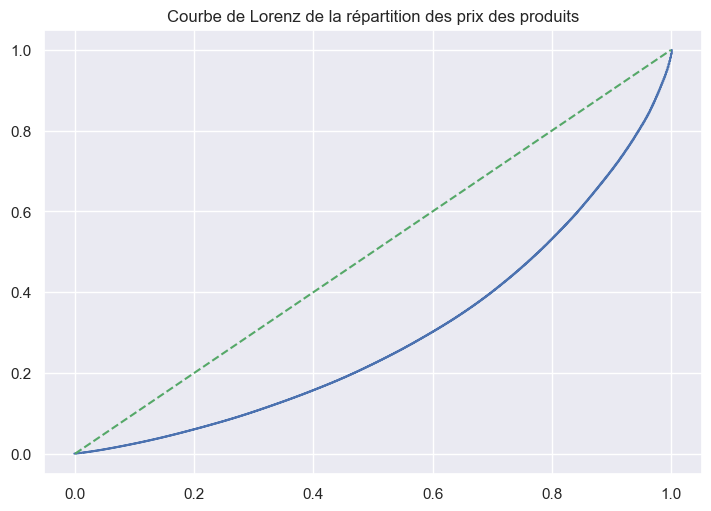

L'indice de Gini représente 0.41


In [67]:
figure8 = plt.figure(layout="constrained", figsize=(7,5))
prix = data_prod["price"].values
n = len(prix)
lorenz = np.cumsum(np.sort(prix)) / prix.sum()
lorenz = np.append([0],lorenz) 
xaxis = np.linspace(0-1/n,1+1/n,n+1) 
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.title("Courbe de Lorenz de la répartition des prix des produits")

# Représentation de la première bissectrice
plt.plot([0,1], [0,1], "g--")

plt.show()

# Indice de Gini
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n 
S = 0.5 - AUC 
gini = 2*S
print("L'indice de Gini représente", round(gini, 2))

Il varie entre 0 (égalité parfaite) et 1 (inégalité extrême).

Dans cette étude des prix, il se situe plus proche de 0 et sous 0,5, ce qui suggère une répartition plutôt homogène des prix.

En effet la présence de 30 valeurs outliers n'a que peu d'influence comparé à la totalité des 825 produits.

## En conclusion

Les 2 bases de données ERP et WEB ainsi que la table de liaison m'ont permis de relier les informations des produits avec leur état de vente en ligne.

Le chiffre d'affaires, uniquement réalisé en ligne, représente 70 658,60 €. 

La plus grande part des ventes concerne les produits dont le prix de vente se situe entre 5,20 € et 100 € avec la plus forte concentration vers les plus petites valeurs.

Il n'y a pas de corrélation avérée entre le prix des produits et le chiffre d'affaires réalisé, c'est à dire que le CA n'augmente pas forcément avec la vente de produits chers. Au contraire, le CA est principalement généré par un plus grand nombre de vente de produits moins chers.

Enfin j'ai listé les prix des produits qui présentent des valeurs outliers, elles sont au nombre de 30. Il n'y a pas d'erreurs, il s'agit de bouteilles de vins qui sont vendues à un prix plus élevé que la moyenne.